In [14]:
import numpy as np
import matplotlib.pyplot as plt 
import nibabel as nib
import os
import sys 

from torch.utils.data import DataLoader 
from matplotlib import gridspec
from pathlib import Path 
from lidc_dataset_creation import LIDC_UQ_Dataset
sys.path.append('/fast/AG_Kainmueller/vguarin/aggrigator_experiments/evaluation/') 
from metrics.dice import dice_coefficient_torchmetrics 

['/usr/lib64/python39.zip', '/usr/lib64/python3.9', '/usr/lib64/python3.9/lib-dynload', '', '/home/vguarin/.local/lib/python3.9/site-packages', '/usr/local/lib64/python3.9/site-packages', '/usr/local/lib/python3.9/site-packages', '/usr/lib64/python3.9/site-packages', '/usr/lib/python3.9/site-packages', 'fast/AG_Kainmueller/aggrigator_experiments/', 'fast/AG_Kainmueller/aggrigator_experiments/evaluation/', 'fast/AG_Kainmueller/aggrigator_experiments/evaluation/', 'fast/AG_Kainmueller/aggrigator_experiments/evaluation/metrics/', 'fast/AG_Kainmueller/aggrigator_experiments/evaluation/metrics/', 'fast/AG_Kainmueller/aggrigator_experiments/evaluation/', '/fast/AG_Kainmueller/aggrigator_experiments/evaluation/', '/fast/AG_Kainmueller/vguarin/aggrigator_experiments/evaluation/', '/fast/AG_Kainmueller/vguarin/aggrigator_experiments/evaluation/']


In [15]:
path = '/fast/AG_Kainmueller/data/ValUES'
cycle = 'FirstCycle'
malign_folder = 'malignancy_fold0_seed123'
texture_folder = 'texture_fold0_seed123'
placehold = 'Softmax'
malign_data_path = Path(path).joinpath(f'{cycle}/{placehold}/test_results/{malign_folder}/') 
texture_data_path = Path(path).joinpath(f'{cycle}/{placehold}/test_results/{texture_folder}/') 

uq_map_id_malign = np.load(f'{path}/UQ_maps/fgbg_noise_0_malignancy_0_00_dropout_pu.npy')/np.log(2)
uq_map_ood_malign = np.load(f'{path}/UQ_maps/fgbg_noise_0_malignancy_1_00_dropout_pu.npy')/np.log(2)
uq_map_id_texture = np.load(f'{path}/UQ_maps/fgbg_noise_0_texture_0_00_dropout_pu.npy')/np.log(2)
uq_map_ood_texture = np.load(f'{path}/UQ_maps/fgbg_noise_0_texture_1_00_dropout_pu.npy')/np.log(2)

eu_map_id_malign = np.load(f'{path}/UQ_maps/fgbg_noise_0_malignancy_0_00_dropout_eu.npy')/np.log(2)
eu_map_ood_malign = np.load(f'{path}/UQ_maps/fgbg_noise_0_malignancy_1_00_dropout_eu.npy')/np.log(2)
eu_map_id_texture = np.load(f'{path}/UQ_maps/fgbg_noise_0_texture_0_00_dropout_eu.npy')/np.log(2)
eu_map_ood_texture = np.load(f'{path}/UQ_maps/fgbg_noise_0_texture_1_00_dropout_eu.npy')/np.log(2)

spat_map_id_malign = np.load(f'{path}/UQ_spatial/fgbg_noise_0_malignancy_0_00_dropout_pu_high_moran.npy')
spat_map_ood_malign = np.load(f'{path}/UQ_spatial/fgbg_noise_0_malignancy_1_00_dropout_pu_high_moran.npy')
spat_map_id_texture = np.load(f'{path}/UQ_spatial/fgbg_noise_0_texture_0_00_dropout_pu_high_moran.npy')
spat_map_ood_texture = np.load(f'{path}/UQ_spatial/fgbg_noise_0_texture_1_00_dropout_pu_high_moran.npy')

pred_id_malign = np.load(f'{path}/UQ_predictions/fgbg_noise_0_malignancy_0_00_dropout.npy')
pred_ood_malign = np.load(f'{path}/UQ_predictions/fgbg_noise_0_malignancy_1_00_dropout.npy')
pred_id_texture = np.load(f'{path}/UQ_predictions/fgbg_noise_0_texture_0_00_dropout.npy')
pred_ood_texture = np.load(f'{path}/UQ_predictions/fgbg_noise_0_texture_1_00_dropout.npy')

meta_id_malign = np.load(f'{path}/UQ_metadata/fgbg_noise_0_malignancy_0_00_dropout_pu_sample_idx.npy')
meta_ood_malign = np.load(f'{path}/UQ_metadata/fgbg_noise_0_malignancy_1_00_dropout_pu_sample_idx.npy')
meta_id_texture = np.load(f'{path}/UQ_metadata/fgbg_noise_0_texture_0_00_dropout_pu_sample_idx.npy')
meta_ood_texture = np.load(f'{path}/UQ_metadata/fgbg_noise_0_texture_1_00_dropout_pu_sample_idx.npy')

In [16]:
malign_data_loader_id = LIDC_UQ_Dataset(
                root_dir=malign_data_path,
                mode="test",
                OOD=False,
                consensus_threshold=2,
                return_2d_slices=True
            )
malign_data_loader_ood = LIDC_UQ_Dataset(
                root_dir=malign_data_path,
                mode="test",
                OOD=True,
                consensus_threshold=2,
                return_2d_slices=True
            )

malign_data_id = DataLoader(
            malign_data_loader_id,
            batch_size=1,
            shuffle=False,
            prefetch_factor=2,
            num_workers=4,
            pin_memory=True
        )

malign_data_ood = DataLoader(
            malign_data_loader_ood,
            batch_size=1,
            shuffle=False,
            prefetch_factor=2,
            num_workers=4,
            pin_memory=True
        )

In [17]:
text_data_loader_id = LIDC_UQ_Dataset(
                root_dir=texture_data_path,
                mode="test",
                OOD=False,
                consensus_threshold=2,
                return_2d_slices=True
            )
text_data_loader_ood = LIDC_UQ_Dataset(
                root_dir=texture_data_path,
                mode="test",
                OOD=True,
                consensus_threshold=2,
                return_2d_slices=True
            )

text_data_id = DataLoader(
            text_data_loader_id,
            batch_size=1,
            shuffle=False,
            prefetch_factor=2,
            num_workers=4,
            pin_memory=True
        )

text_data_ood = DataLoader(
            text_data_loader_ood,
            batch_size=1,
            shuffle=False,
            prefetch_factor=2,
            num_workers=4,
            pin_memory=True
        )

In [18]:
malign_id_gt = np.array([label.numpy().squeeze() for _, label in malign_data_id])
malign_ood_gt = np.array([label.numpy().squeeze() for _, label in malign_data_ood])
text_id_gt = np.array([label.numpy().squeeze() for _, label in text_data_id])
text_ood_gt = np.array([label.numpy().squeeze() for _, label in text_data_ood])

/home/vguarin/.local/lib/python3.9/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [11]:
meta_id_malign

array(['0027_03', '0027_04', '0028_00', '0031_01', '0038_00', '0038_03',
       '0056_00', '0056_05', '0056_10', '0057_04', '0057_06', '0079_00',
       '0079_01', '0093_00', '0116_00', '0117_00', '0117_03', '0124_00',
       '0124_01', '0126_01', '0144_03', '0147_00', '0147_01', '0147_03',
       '0161_00', '0161_02', '0172_01', '0172_02', '0172_03', '0180_08',
       '0189_04', '0189_05', '0189_06', '0207_00', '0230_00', '0230_05',
       '0238_01', '0263_00', '0272_00', '0287_00', '0300_01', '0300_02',
       '0300_03', '0345_00', '0379_00', '0380_00', '0394_00', '0394_01',
       '0394_02', '0394_04', '0394_05', '0411_00', '0419_00', '0419_03',
       '0441_00', '0441_02', '0441_03', '0455_03', '0455_05', '0455_08',
       '0461_00', '0461_01', '0461_02', '0495_04', '0507_00', '0507_01',
       '0524_00', '0530_00', '0575_01', '0575_02', '0589_09', '0609_01',
       '0609_02', '0609_04', '0618_00', '0699_00', '0699_01', '0699_02',
       '0732_00', '0739_00', '0739_03', '0739_04', 

In [12]:
meta_ood_malign

array(['0014_01', '0026_00', '0027_00', '0027_05', '0034_00', '0054_02',
       '0056_09', '0062_01', '0068_00', '0070_00', '0071_00', '0079_05',
       '0087_00', '0097_00', '0103_00', '0103_02', '0113_01', '0115_00',
       '0117_01', '0117_02', '0126_00', '0147_04', '0151_01', '0151_02',
       '0161_01', '0164_00', '0172_00', '0180_00', '0184_01', '0188_03',
       '0189_03', '0195_01', '0195_02', '0196_01', '0196_03', '0196_04',
       '0197_00', '0205_00', '0207_01', '0212_00', '0230_01', '0230_02',
       '0230_03', '0230_06', '0240_04', '0249_01', '0252_00', '0262_00',
       '0265_00', '0309_01', '0313_00', '0326_00', '0339_00', '0379_01',
       '0381_00', '0408_03', '0411_01', '0419_06', '0455_07', '0469_02',
       '0495_00', '0495_02', '0495_06', '0503_00', '0521_00', '0568_01',
       '0611_00', '0615_01', '0630_00', '0644_01', '0644_02', '0690_00',
       '0713_00', '0713_01', '0730_00', '0750_00', '0760_02', '0762_01',
       '0765_02', '0786_01', '0790_00', '0836_02', 

In [54]:
fd_index_id_min = int(np.argwhere(uq_map_id_malign.mean(-1).mean(-1) == uq_map_id_malign.mean(-1).mean(-1).min())[0][0])
fd_index_id_max = int(np.argwhere(uq_map_id_malign.mean(-1).mean(-1) == uq_map_id_malign.mean(-1).mean(-1).max())[0][0])


In [69]:
print(dice_coefficient_torchmetrics(pred_id_malign[fd_index_id_min][None,], malign_id_gt[fd_index_id_min][None,]))
print(dice_coefficient_torchmetrics(pred_id_malign[fd_index_id_max][None,], malign_id_gt[fd_index_id_max][None,]))

print(np.mean(uq_map_id_malign[fd_index_id_min]))
print(np.mean(uq_map_ood_malign[fd_index_id_max]))

[0.89655172]
[0.64]
0.0011941822397853023
0.008525284231872446


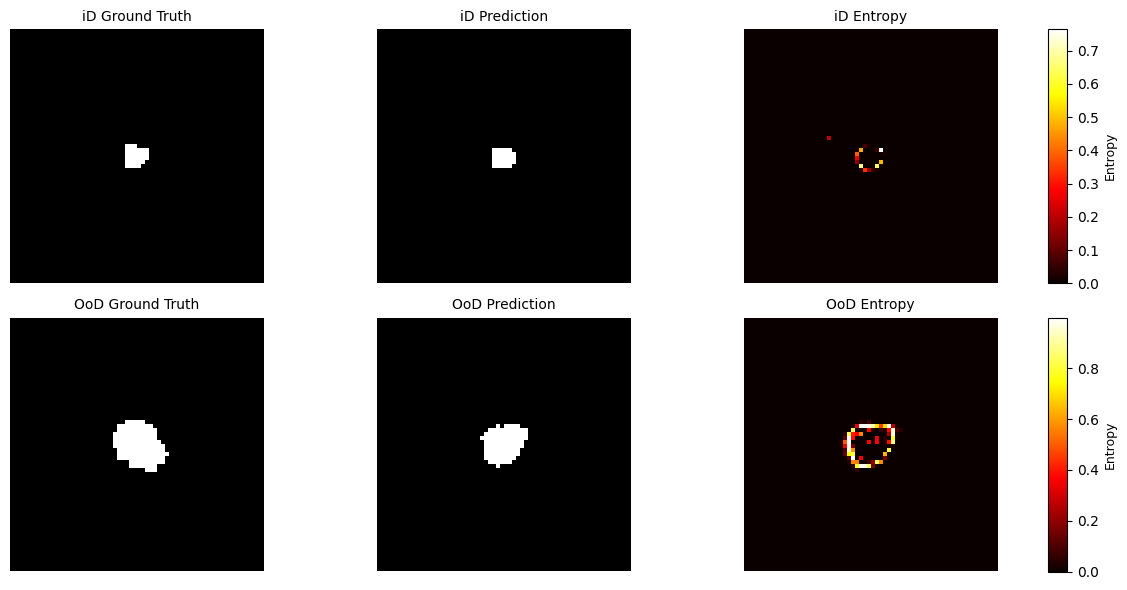

In [57]:
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(2, 4, width_ratios=[1, 1, 1, 0.05])  # Last column for colorbars

idx_id, idx_ood = 8, 0

# First row (iD)
ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[0, 1])
ax2 = plt.subplot(gs[0, 2])
cax1 = plt.subplot(gs[0, 3])  # Colorbar for entropy (iD)

# Second row (OoD)
ax3 = plt.subplot(gs[1, 0])
ax4 = plt.subplot(gs[1, 1])
ax5 = plt.subplot(gs[1, 2])
cax2 = plt.subplot(gs[1, 3])  # Colorbar for entropy (OoD)

# iD Ground Truth
im0 = ax0.imshow(malign_id_gt[fd_index_id_min], cmap='gray')
ax0.set_title('iD Ground Truth', fontsize=10)
ax0.axis('off')

# iD Prediction
im1 = ax1.imshow(pred_id_malign[fd_index_id_min], cmap='gray')
ax1.set_title('iD Prediction', fontsize=10)
ax1.axis('off')

# iD Entropy
im2 = ax2.imshow(uq_map_id_malign[fd_index_id_min], cmap='hot')
ax2.set_title('iD Entropy', fontsize=10)
ax2.axis('off')
fig.colorbar(im2, cax=cax1)
cax1.set_ylabel('Entropy', fontsize=9)

# OoD Ground Truth
im3 = ax3.imshow(text_ood_gt[fd_index_id_max], cmap='gray')
ax3.set_title('OoD Ground Truth', fontsize=10)
ax3.axis('off')

# OoD Prediction
im4 = ax4.imshow(pred_ood_malign[fd_index_id_max], cmap='gray')
ax4.set_title('OoD Prediction', fontsize=10)
ax4.axis('off')

# OoD Entropy
im5 = ax5.imshow(uq_map_ood_malign[fd_index_id_max], cmap='hot')
ax5.set_title('OoD Entropy', fontsize=10)
ax5.axis('off')
fig.colorbar(im5, cax=cax2)
cax2.set_ylabel('Entropy', fontsize=9)

plt.tight_layout()
plt.show()

In [22]:
np.where(uq_map_id_malign.min())

/tmp/ipykernel_2157518/1585877111.py:1: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(arr).nonzero()` if the old behavior was intended.
  np.where(uq_map_id_malign.min())


(array([], dtype=int64),)

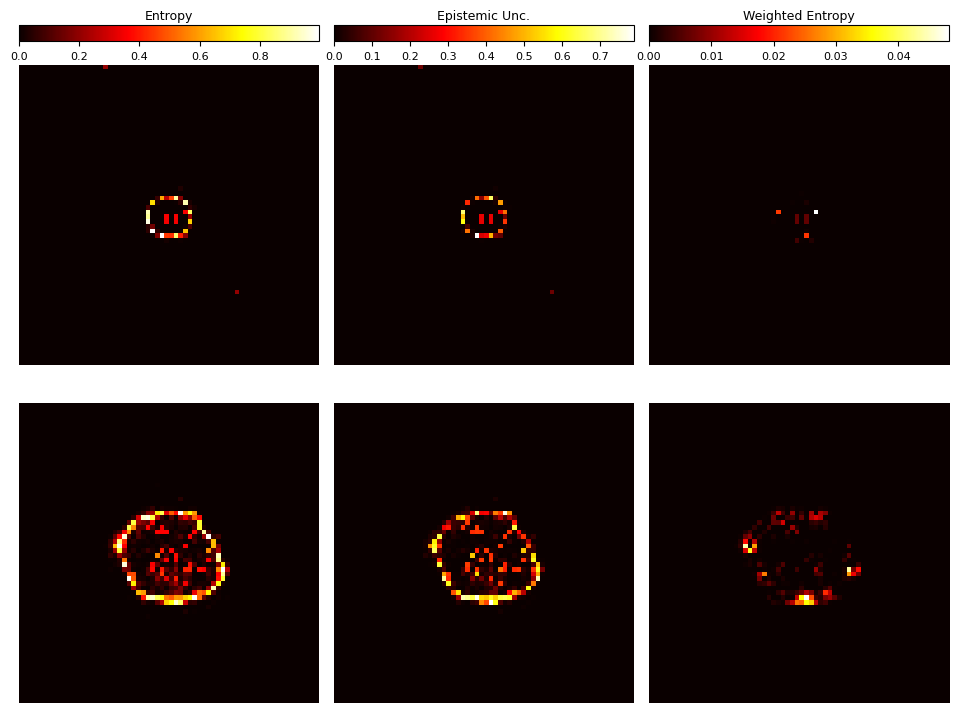

In [190]:
fig = plt.figure(figsize=(12, 9))
gs = gridspec.GridSpec(3, 3, height_ratios=[0.05, 1, 1], width_ratios=[1, 1, 1], hspace=0.04, wspace=0.05)

idx_id, idx_ood = 4, 30

# Colorbars (top row)
cax0 = plt.subplot(gs[0, 0])
cax1 = plt.subplot(gs[0, 1])
cax2 = plt.subplot(gs[0, 2])

# First row images (iD)
ax0 = plt.subplot(gs[1, 0])
ax1 = plt.subplot(gs[1, 1])
ax2 = plt.subplot(gs[1, 2])

# Second row images (OoD)
ax3 = plt.subplot(gs[2, 0])
ax4 = plt.subplot(gs[2, 1])
ax5 = plt.subplot(gs[2, 2])

# Plot images
im0 = ax0.imshow(uq_map_id_malign[idx_id], cmap='hot')
# ax0.set_title('Entropy sample', fontsize=10)
ax0.axis('off')

im1 = ax1.imshow(eu_map_id_malign[idx_id], cmap='hot')
# ax1.set_title('Epistemic Unc. sample', fontsize=10)
ax1.axis('off')

im2 = ax2.imshow(spat_map_id_malign[idx_id]/np.log(2), cmap='hot')
# ax2.set_title("Weighted-Entr. by local Moran's I", fontsize=10)
ax2.axis('off')

im3 = ax3.imshow(uq_map_ood_malign[idx_ood], cmap='hot')
ax3.axis('off')

im4 = ax4.imshow(eu_map_ood_malign[idx_ood], cmap='hot')
ax4.axis('off')

im5 = ax5.imshow(spat_map_ood_malign[idx_ood]/np.log(2), cmap='hot')
ax5.axis('off')

# Colorbars (horizontal on top)
fig.colorbar(im0, cax=cax0, orientation='horizontal')
cax0.set_xlabel('Entropy', fontsize=9)
cax0.xaxis.set_label_position('top')
cax0.tick_params(axis='x', labelsize=8)

fig.colorbar(im1, cax=cax1, orientation='horizontal')
cax1.set_xlabel('Epistemic Unc.', fontsize=9)
cax1.xaxis.set_label_position('top')
cax1.tick_params(axis='x', labelsize=8)

fig.colorbar(im2, cax=cax2, orientation='horizontal')
cax2.set_xlabel("Weighted Entropy", fontsize=9)
cax2.xaxis.set_label_position('top')
cax2.tick_params(axis='x', labelsize=8)

plt.show()


In [186]:
print((spat_map_id_malign[idx_id]/np.log(2)).mean())
print((spat_map_ood_malign[idx_ood]/np.log(2)).mean())

3.100305900239644e-05
0.0016631509846986347


In [178]:
thresh = 0.2
print(uq_map_id_malign[idx_id][uq_map_id_malign[idx_id] > thresh].sum()/(uq_map_id_malign[idx_id] > thresh).sum())
print(uq_map_ood_malign[idx_ood][uq_map_ood_malign[idx_ood] > thresh].sum()/(uq_map_ood_malign[idx_ood] > thresh).sum())
print(f'iD No. pixels: {(uq_map_id_malign[idx_id] > thresh).sum()}')
print(f'OoD No. pixels: {(uq_map_ood_malign[idx_ood] > thresh).sum()}')
print(f'iD Values: {uq_map_id_malign[idx_id][uq_map_id_malign[idx_id] > thresh]}')
print(f'OoD Values: {uq_map_ood_malign[idx_ood][uq_map_ood_malign[idx_ood] > thresh]}')

0.5887135484066263
0.549942486995034
iD No. pixels: 26
OoD No. pixels: 121
iD Values: [0.20572092 0.61369606 0.25641115 0.45919983 0.9029925  0.69246256
 0.91431162 0.9207823  0.35561304 0.83266407 0.88941972 0.35537203
 0.35587426 0.21299783 0.96449341 0.35323059 0.35367467 0.67264582
 0.99534607 0.65364431 0.99454738 0.44704564 0.43477769 0.85104428
 0.41286362 0.20572092]
OoD Values: [0.21610291 0.7188223  0.82326367 0.31940693 0.50510316 0.37754139
 0.99177424 0.59059612 0.75196318 0.59035457 0.30446293 0.94783474
 0.97284403 0.81084316 0.24063808 0.20086275 0.33128631 0.50490895
 0.38174103 0.81209597 0.22247229 0.35875521 0.78977942 0.82424569
 0.5672165  0.36751764 0.35671708 0.7865556  0.34411248 0.57088042
 0.37100506 0.35987737 0.36333317 0.3640205  0.91354699 0.37327987
 0.96190714 0.36467296 0.21931926 0.99466072 0.24852334 0.87252603
 0.4274351  0.64486241 0.64447433 0.97602046 0.36143324 0.3578612
 0.64074342 0.21925092 0.79753532 0.2048478  0.40005964 0.36446464
 0.57106

In [183]:
malign_id = malign_id_gt[idx_id]
maign_ood = malign_ood_gt[idx_ood]
uq_map_id = spat_map_id_malign[idx_id]/np.log(2)
uq_map_ood = spat_map_ood_malign[idx_ood]/np.log(2)

malign_id_fg_classes = [class_id for class_id in np.unique(malign_id) if not class_id == 0]
weights_id = {id: 1 / len(malign_id_fg_classes) for id in malign_id_fg_classes}
class_ids_id = list(weights_id.keys())
class_means_id= {class_id: np.sum(uq_map_id[malign_id == class_id], dtype=np.float64) / len(np.argwhere(malign_id== class_id))
                       for class_id in class_ids_id}
print(f"iD class-based aggregated value: {sum(class_means_id[id] * weights_id[id] for id in class_ids_id)}")

malign_ood_fg_classes = [class_id for class_id in np.unique(maign_ood) if not class_id == 0]
weights_ood = {id: 1 / len(malign_ood_fg_classes) for id in malign_ood_fg_classes}
class_ids_ood = list(weights_ood.keys())
class_means_ood = {class_id: np.sum(uq_map_ood[maign_ood == class_id], dtype=np.float64) / len(np.argwhere(maign_ood == class_id))
                       for class_id in class_ids_ood}
print(f"OoD class-based aggregated value: {sum(class_means_ood[id] * weights_ood[id] for id in class_ids_ood)}")

print(f"iD class-based unc. value: {np.sum(uq_map_id[malign_id == 1], dtype=np.float64)}")
print(f"OoD class-based unc. value: {np.sum(uq_map_ood[maign_ood == 1], dtype=np.float64)}")
print(f"iD class volume: {len(np.argwhere(malign_id == 1))}")
print(f"OoD class volume: {len(np.argwhere(maign_ood == 1))}")

iD class-based aggregated value: 0.0015698111235114092
OoD class-based aggregated value: 0.016360311257505266
iD class-based unc. value: 0.1193056453868671
OoD class-based unc. value: 5.677028006354327
iD class volume: 76
OoD class volume: 347


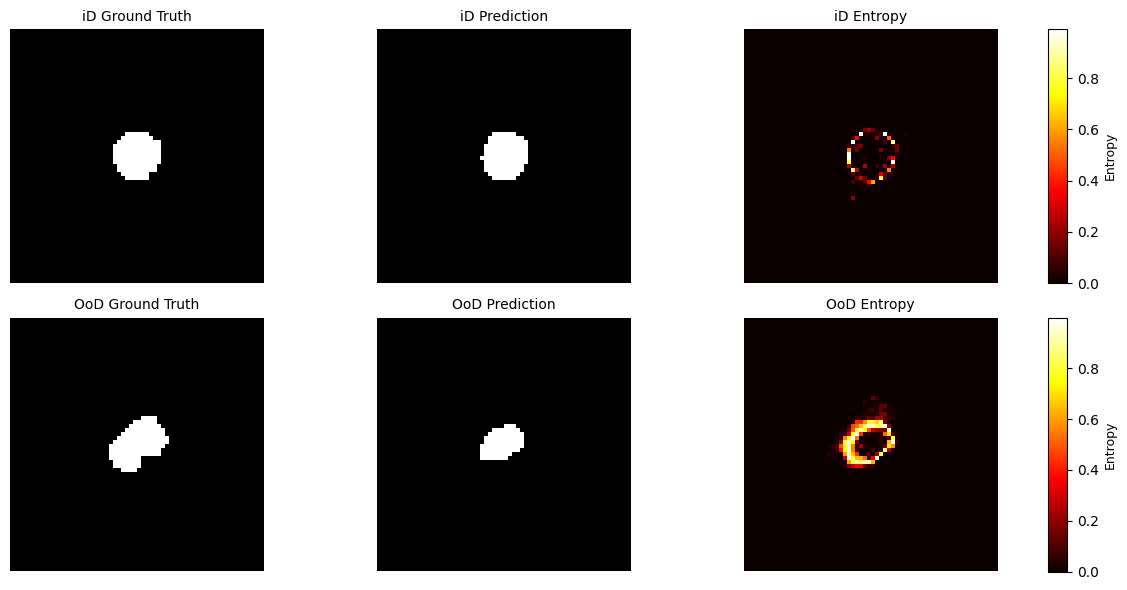

In [16]:
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(2, 4, width_ratios=[1, 1, 1, 0.05])  # Last column for colorbars

idx_id, idx_ood = 8, 0

# First row (iD)
ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[0, 1])
ax2 = plt.subplot(gs[0, 2])
cax1 = plt.subplot(gs[0, 3])  # Colorbar for entropy (iD)

# Second row (OoD)
ax3 = plt.subplot(gs[1, 0])
ax4 = plt.subplot(gs[1, 1])
ax5 = plt.subplot(gs[1, 2])
cax2 = plt.subplot(gs[1, 3])  # Colorbar for entropy (OoD)

# iD Ground Truth
im0 = ax0.imshow(text_id_gt[idx_id], cmap='gray')
ax0.set_title('iD Ground Truth', fontsize=10)
ax0.axis('off')

# iD Prediction
im1 = ax1.imshow(pred_id_texture[idx_id], cmap='gray')
ax1.set_title('iD Prediction', fontsize=10)
ax1.axis('off')

# iD Entropy
im2 = ax2.imshow(uq_map_id_texture[idx_id], cmap='hot')
ax2.set_title('iD Entropy', fontsize=10)
ax2.axis('off')
fig.colorbar(im2, cax=cax1)
cax1.set_ylabel('Entropy', fontsize=9)

# OoD Ground Truth
im3 = ax3.imshow(text_ood_gt[idx_ood], cmap='gray')
ax3.set_title('OoD Ground Truth', fontsize=10)
ax3.axis('off')

# OoD Prediction
im4 = ax4.imshow(pred_ood_texture[idx_ood], cmap='gray')
ax4.set_title('OoD Prediction', fontsize=10)
ax4.axis('off')

# OoD Entropy
im5 = ax5.imshow(uq_map_ood_texture[idx_ood], cmap='hot')
ax5.set_title('OoD Entropy', fontsize=10)
ax5.axis('off')
fig.colorbar(im5, cax=cax2)
cax2.set_ylabel('Entropy', fontsize=9)

plt.tight_layout()
plt.show()

In [17]:
thresh = 0.7
print(uq_map_id_texture[idx_id][uq_map_id_texture[idx_id] > thresh].sum()/(uq_map_id_texture[idx_id] > thresh).sum())
print(uq_map_ood_texture[idx_ood][uq_map_ood_texture[idx_ood] > thresh].sum()/(uq_map_ood_texture[idx_ood] > thresh).sum())
print(f'iD No. pixels: {(uq_map_id_texture[idx_id] > thresh).sum()}')
print(f'OoD No. pixels: {(uq_map_ood_texture[idx_ood] > thresh).sum()}')
print(f'iD Values: {uq_map_id_texture[idx_id][uq_map_id_texture[idx_id] > thresh]}')
print(f'OoD Values: {uq_map_ood_texture[idx_ood][uq_map_ood_texture[idx_ood] > thresh]}')

0.9211810761845436
0.8698629224872819
iD No. pixels: 10
OoD No. pixels: 38
iD Values: [0.98308671 0.98549567 0.97556454 0.86176147 0.99074011 0.97361606
 0.78701007 0.97324905 0.87414576 0.80714132]
OoD Values: [0.74547299 0.80057554 0.85452263 0.85677672 0.99999897 0.93783911
 0.8232524  0.85252901 0.99532663 0.77956296 0.96967972 0.74301613
 0.95653526 0.77910256 0.97192555 0.70811935 0.75919067 0.99621535
 0.80392284 0.80443466 0.98038263 0.76358586 0.99839231 0.76288477
 0.92726209 0.73844053 0.9331107  0.86687253 0.92108774 0.83099558
 0.98400063 0.82011647 0.93406409 0.81763614 0.93318414 0.86909885
 0.90714906 0.92852788]


In [18]:
text_id_fg_classes = [class_id for class_id in np.unique(text_id_gt[idx_id]) if not class_id == 0]
weights_id = {id: 1 / len(text_id_fg_classes) for id in text_id_fg_classes}
class_ids_id = list(weights_id.keys())
class_means_id= {class_id: np.sum(uq_map_id_texture[idx_id][text_id_gt[idx_id] == class_id], dtype=np.float64) / len(np.argwhere(text_id_gt[idx_id] == class_id))
                       for class_id in class_ids_id}
print(f"iD class-based aggregated value: {sum(class_means_id[id] * weights_id[id] for id in class_ids_id)}")

text_ood_fg_classes = [class_id for class_id in np.unique(text_ood_gt[idx_ood]) if not class_id == 0]
weights_ood = {id: 1 / len(text_ood_fg_classes) for id in text_ood_fg_classes}
class_ids_ood = list(weights_ood.keys())
class_means_ood = {class_id: np.sum(uq_map_ood_texture[idx_ood][text_ood_gt[idx_ood] == class_id], dtype=np.float64) / len(np.argwhere(text_ood_gt[idx_ood] == class_id))
                       for class_id in class_ids_ood}
print(f"OoD class-based aggregated value: {sum(class_means_ood[id] * weights_ood[id] for id in class_ids_ood)}")

print(f"iD class-based unc. value: {np.sum(uq_map_id_texture[idx_id][text_id_gt[idx_id] == 1], dtype=np.float64)}")
print(f"OoD class-based unc. value: {np.sum(uq_map_ood_texture[idx_ood][text_ood_gt[idx_ood] == 1], dtype=np.float64)}")
print(f"iD class volume: {len(np.argwhere(text_id_gt[idx_id] == 1))}")
print(f"OoD class volume: {len(np.argwhere(text_ood_gt[idx_ood] == 1))}")

iD class-based aggregated value: 0.11506391140942807
OoD class-based aggregated value: 0.34699363305519615
iD class-based unc. value: 13.577541546312512
OoD class-based unc. value: 45.80315956328589
iD class volume: 118
OoD class volume: 132


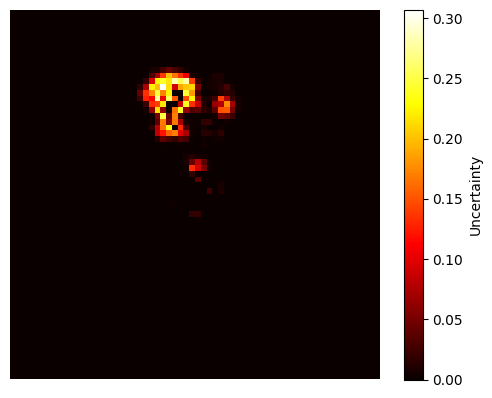

In [102]:
plt.imshow(spat_map_id_malign[15], cmap="hot")
plt.colorbar(label='Uncertainty')
plt.axis('off')  # optional, to remove axes
plt.show()

In [106]:
thresh = 0.3
print(spat_map_id_malign[15][spat_map_id_malign[15] > thresh].sum()/(spat_map_id_malign[15] > thresh).sum() if (spat_map_id_malign[15] > thresh).sum() > 0 else 0.0001)
print(spat_map_ood_malign[13][spat_map_ood_malign[13] > thresh].sum()/(spat_map_ood_malign[13] > thresh).sum() if (spat_map_ood_malign[13] > thresh).sum() else 0.0001)

0.3067838394500736
0.30789919854954817


In [108]:
print(spat_map_id_malign[15].mean())
print(spat_map_ood_malign[13].mean())

0.003460820534416667
0.012735935445881266


In [98]:
np.where(spat_map_ood_malign > 0.3)

(array([13, 29, 69, 69, 72, 72, 72]),
 array([35, 36, 38, 39, 28, 31, 32]),
 array([23, 35, 36, 33, 30, 26, 30]))

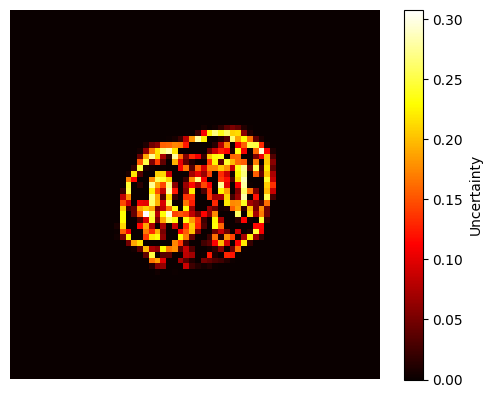

In [99]:
plt.imshow(spat_map_ood_malign[13], cmap='hot')
plt.colorbar(label='Uncertainty')
plt.axis('off')  # optional, to remove axes
plt.show()

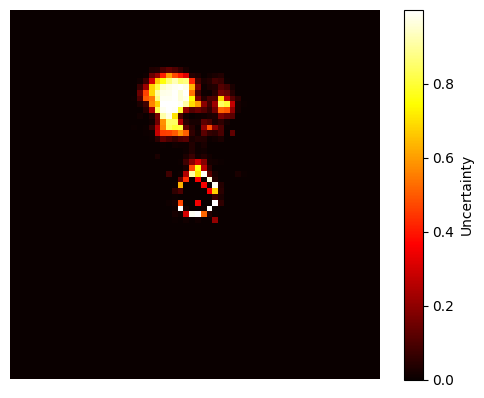

In [110]:
plt.imshow(uq_map_id_malign[15], cmap='hot')
plt.colorbar(label='Uncertainty')
plt.axis('off')  # optional, to remove axes
plt.show()

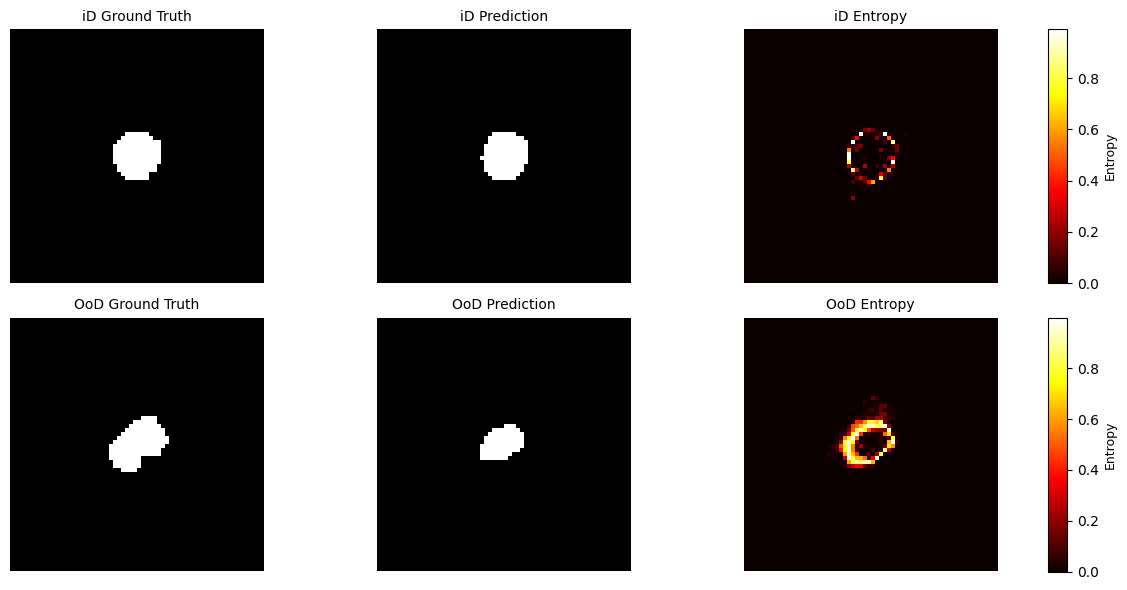

In [115]:
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(2, 4, width_ratios=[1, 1, 1, 0.05])  # Last column for colorbars

idx_id, idx_ood = 8, 0

# First row (iD)
ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[0, 1])
ax2 = plt.subplot(gs[0, 2])
cax1 = plt.subplot(gs[0, 3])  # Colorbar for entropy (iD)

# Second row (OoD)
ax3 = plt.subplot(gs[1, 0])
ax4 = plt.subplot(gs[1, 1])
ax5 = plt.subplot(gs[1, 2])
cax2 = plt.subplot(gs[1, 3])  # Colorbar for entropy (OoD)

# iD Ground Truth
im0 = ax0.imshow(text_id_gt[idx_id], cmap='gray')
ax0.set_title('iD Ground Truth', fontsize=10)
ax0.axis('off')

# iD Prediction
im1 = ax1.imshow(pred_id_texture[idx_id], cmap='gray')
ax1.set_title('iD Prediction', fontsize=10)
ax1.axis('off')

# iD Entropy
im2 = ax2.imshow(uq_map_id_texture[idx_id], cmap='hot')
ax2.set_title('iD Entropy', fontsize=10)
ax2.axis('off')
fig.colorbar(im2, cax=cax1)
cax1.set_ylabel('Entropy', fontsize=9)

# OoD Ground Truth
im3 = ax3.imshow(text_ood_gt[idx_ood], cmap='gray')
ax3.set_title('OoD Ground Truth', fontsize=10)
ax3.axis('off')

# OoD Prediction
im4 = ax4.imshow(pred_ood_texture[idx_ood], cmap='gray')
ax4.set_title('OoD Prediction', fontsize=10)
ax4.axis('off')

# OoD Entropy
im5 = ax5.imshow(uq_map_ood_texture[idx_ood], cmap='hot')
ax5.set_title('OoD Entropy', fontsize=10)
ax5.axis('off')
fig.colorbar(im5, cax=cax2)
cax2.set_ylabel('Entropy', fontsize=9)

plt.tight_layout()
plt.show()

In [61]:
base_id = '0027_03' # texture: 0085_03 ood & 0014_01 id; malignancy: 0713_00 ood & 0027_03 id
mode = 'id'
ood_variation = 'malignancy'
path = f'/fast/AG_Kainmueller/data/ValUES/FirstCycle/Dropout/test_results/{ood_variation}_fold0_seed123/{mode}/input'
img = nib.load(f'{path}/{base_id}.nii.gz')
path_entr = f'/fast/AG_Kainmueller/data/ValUES/FirstCycle/Dropout/test_results/{ood_variation}_fold0_seed123/{mode}/pred_entropy'
entr = nib.load(f'{path_entr}/{base_id}.nii.gz')
path_pred = f'/fast/AG_Kainmueller/data/ValUES/FirstCycle/Dropout/test_results/{ood_variation}_fold0_seed123/{mode}/pred_seg'
preds = nib.load(f'{path_pred}/{base_id}_mean.nii.gz')

gt_path = f'/fast/AG_Kainmueller/data/ValUES/FirstCycle/Dropout/test_results/{ood_variation}_fold0_seed123/{mode}/gt_seg'
gt_masks = []
for i in range(4):
    fname = f"{base_id}_{i:02d}.nii.gz"
    full_path = os.path.join(gt_path, fname)
    if os.path.exists(full_path):
        gt = nib.load(full_path).get_fdata()
        gt_masks.append(gt)
gt_stack = np.stack(gt_masks, axis=-1)

In [62]:
consensus_threshold = 2
data_img = img.get_fdata()
data_entr = entr.get_fdata()
data_gt = (np.sum(gt_stack, axis=-1) >= consensus_threshold).astype(np.uint8)
data_pred = preds.get_fdata()
# data_gt = np.any(gt_stack, axis=-1).astype(np.uint8) #consensus as in ValUES
print(f"Image shape: {data_img.shape}, Raters consensus: {data_gt.shape}, Pred. shape: {data_pred.shape}, Entropy shape: {data_entr.shape}")

Image shape: (64, 64, 64), Raters consensus: (64, 64, 64), Pred. shape: (64, 64, 64), Entropy shape: (64, 64, 64)


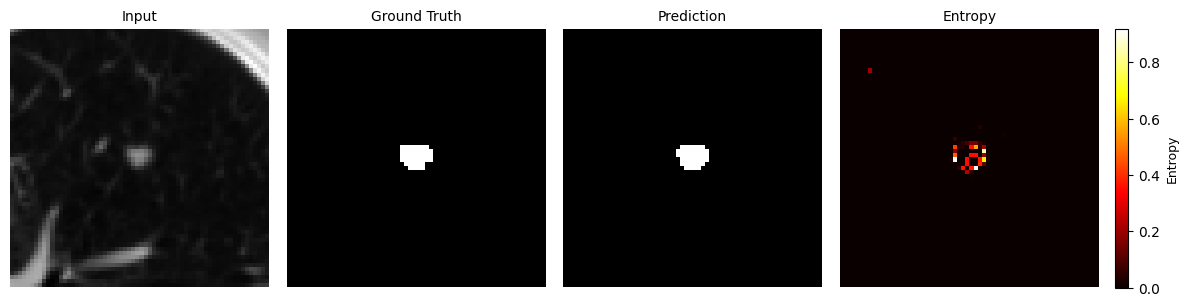

In [63]:
# Prepare slices
slice_img = data_img[:, :, data_img.shape[2] // 2,]
slice_gt = data_gt[:, :, data_gt.shape[2] // 2, ]
slice_pred = data_pred[:, :, data_pred.shape[2] // 2, ]
slice_entr = data_entr[:, :, data_entr.shape[2] // 2] / np.log(2)
# slice2 = data_entr.mean(-1) #data_entr[:, :, data_entr.shape[2] // 2]

# Create figure with gridspec: 3 images + 1 colorbar
fig = plt.figure(figsize=(12, 3))
gs = gridspec.GridSpec(1, 5, width_ratios=[1, 1, 1, 1, 0.05])  # 4 images, 1 colorbar

# Axes for images
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])
ax3 = plt.subplot(gs[3])  # colorbar axis
cax = plt.subplot(gs[4])  # colorbar axis

# Plot input
im0 = ax0.imshow(slice_img, cmap='gray')
ax0.set_title('Input', fontsize=10)
ax0.axis('off')

# Plot ground truth
im1 = ax1.imshow(slice_gt, cmap='gray')
ax1.set_title('Ground Truth', fontsize=10)
ax1.axis('off')

# Plot predictions
im2 = ax2.imshow(slice_pred, cmap='gray')
ax2.set_title('Prediction', fontsize=10)
ax2.axis('off')

# Plot entropy
im3 = ax3.imshow(slice_entr, cmap='hot')
ax3.set_title('Entropy', fontsize=10)
ax3.axis('off')

# Colorbar for entropy image
cbar = fig.colorbar(im3, cax=cax)
cbar.set_label('Entropy', fontsize=9)

plt.tight_layout()
plt.show()

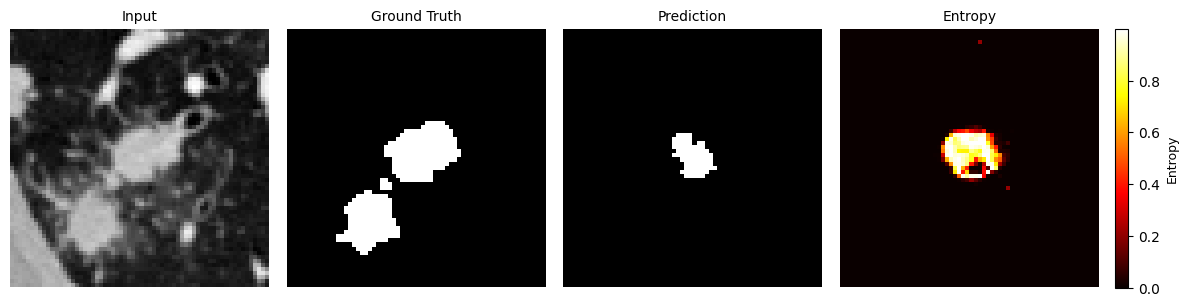

In [60]:
# Prepare slices
slice_img = data_img[:, :, data_img.shape[2] // 2,]
slice_gt = data_gt[:, :, data_gt.shape[2] // 2, ]
slice_pred = data_pred[:, :, data_pred.shape[2] // 2, ]
slice_entr = data_entr[:, :, data_entr.shape[2] // 2] / np.log(2)
# slice2 = data_entr.mean(-1) #data_entr[:, :, data_entr.shape[2] // 2]

# Create figure with gridspec: 3 images + 1 colorbar
fig = plt.figure(figsize=(12, 3))
gs = gridspec.GridSpec(1, 5, width_ratios=[1, 1, 1, 1, 0.05])  # 4 images, 1 colorbar

# Axes for images
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])
ax3 = plt.subplot(gs[3])  # colorbar axis
cax = plt.subplot(gs[4])  # colorbar axis

# Plot input
im0 = ax0.imshow(slice_img, cmap='gray')
ax0.set_title('Input', fontsize=10)
ax0.axis('off')

# Plot ground truth
im1 = ax1.imshow(slice_gt, cmap='gray')
ax1.set_title('Ground Truth', fontsize=10)
ax1.axis('off')

# Plot predictions
im2 = ax2.imshow(slice_pred, cmap='gray')
ax2.set_title('Prediction', fontsize=10)
ax2.axis('off')

# Plot entropy
im3 = ax3.imshow(slice_entr, cmap='hot')
ax3.set_title('Entropy', fontsize=10)
ax3.axis('off')

# Colorbar for entropy image
cbar = fig.colorbar(im3, cax=cax)
cbar.set_label('Entropy', fontsize=9)

plt.tight_layout()
plt.show()